## 1. Importing the Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
#import scikit-learn as sci
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
results_file = 'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/write/pbmc3k.h5ad'  

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.5


In [3]:
adata_ti = sc.read_h5ad(
   'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/endometrium_all.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_ti.var_names_make_unique()

## 2. Subsetting the Samples:

In [4]:
adata_ti_pro_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181",:] #pro sample 1
adata_ti_pro_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182",:] #pro sample 2
adata_ti_sec_1 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625698",:] #sec sample 1
adata_ti_sec_2 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625699",:] #sec sample 2

data_list = [adata_ti_pro_1, adata_ti_pro_2, adata_ti_sec_1, adata_ti_sec_2]

## 3. Looking at each individual Sample using UMAPs:

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:20)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


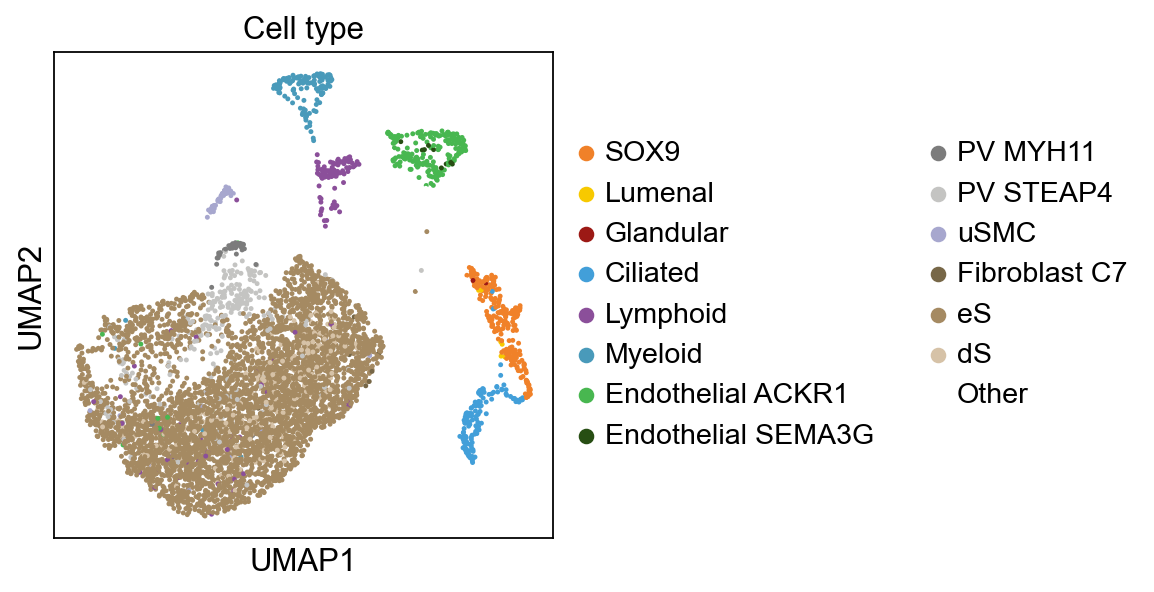

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:19)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


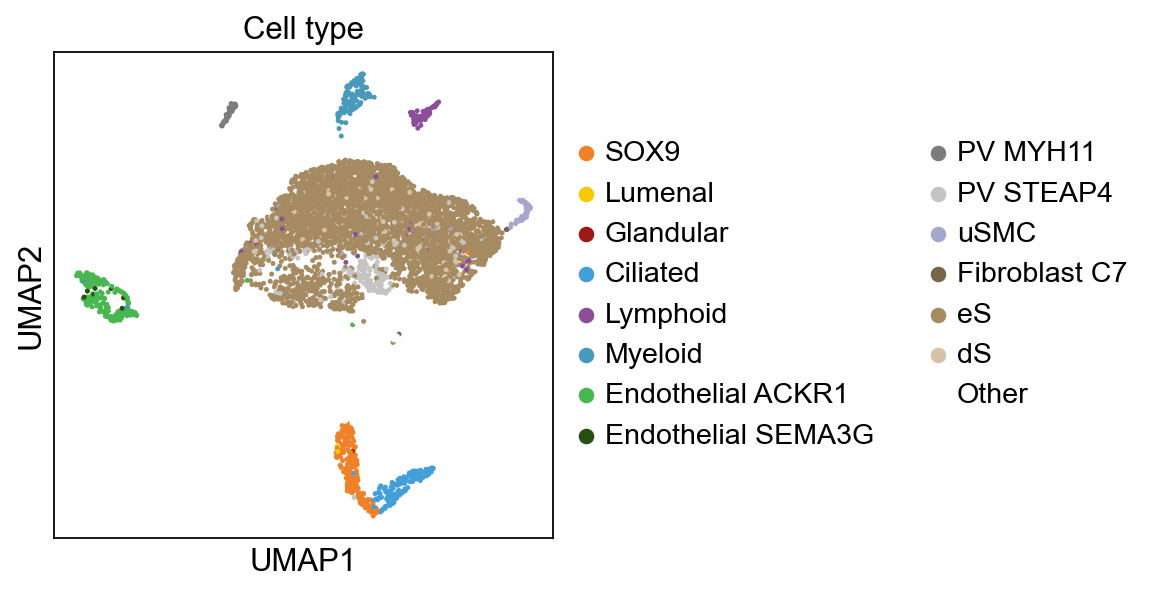

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:18)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


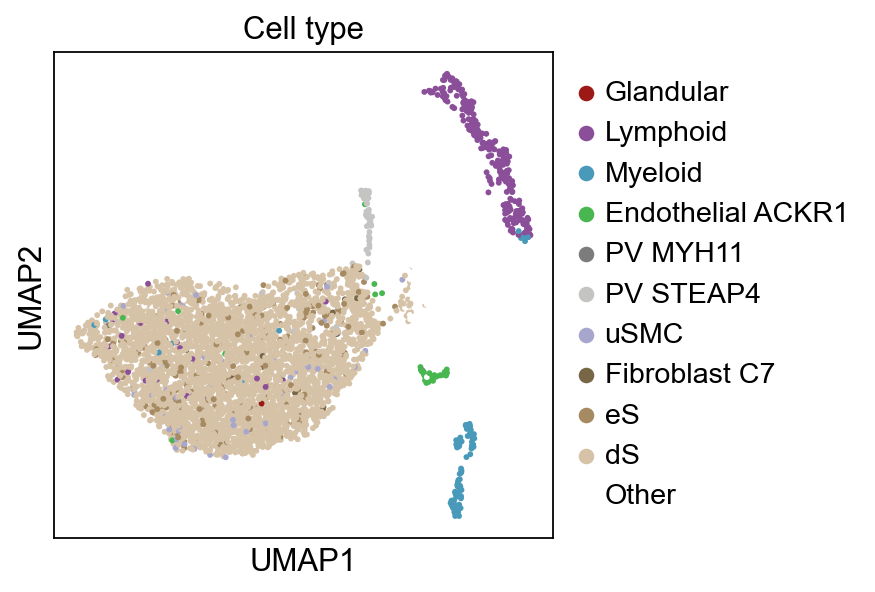

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:09)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


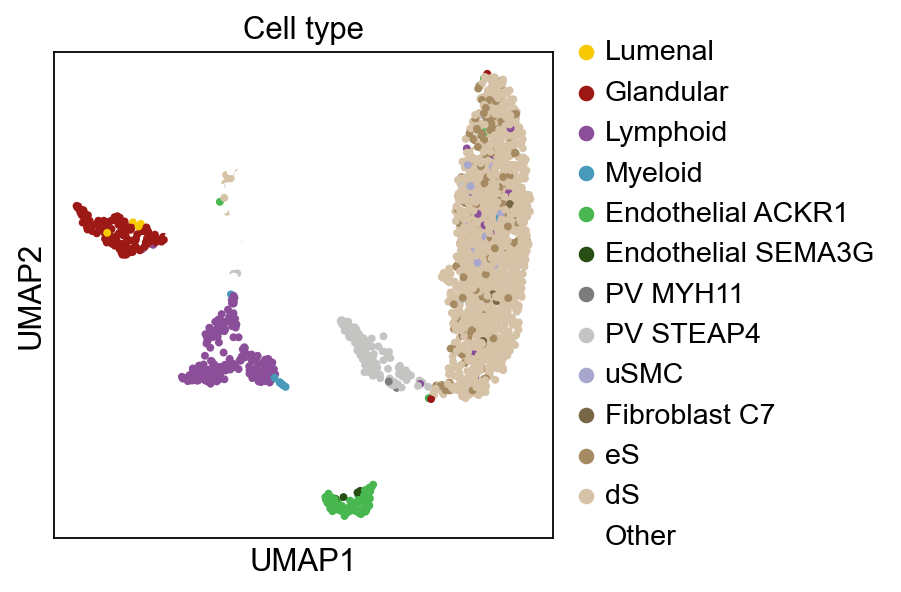

In [5]:
for item in data_list:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Cell type")

## 4. Merge Pro Samples and Sec Samples + UMAPs:

In [6]:
adata_ti_merged_pro = ad.concat([adata_ti_pro_1,adata_ti_pro_2], join="outer")
adata_ti_merged_sec = ad.concat([adata_ti_sec_1,adata_ti_sec_2], join="outer")

data_list_2 = [adata_ti_merged_pro, adata_ti_merged_sec]

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


... storing 'SampleID' as categorical


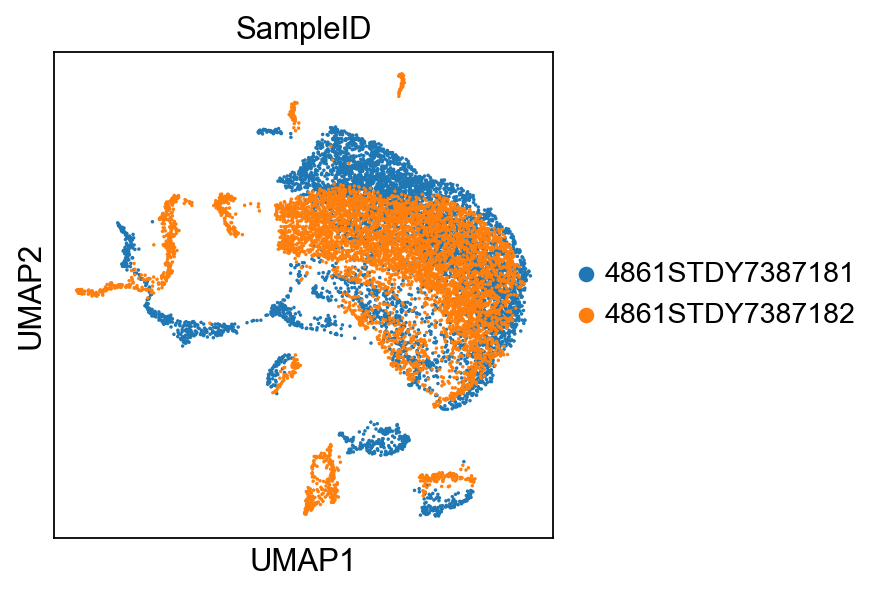

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


... storing 'SampleID' as categorical
... storing 'Cell type' as categorical


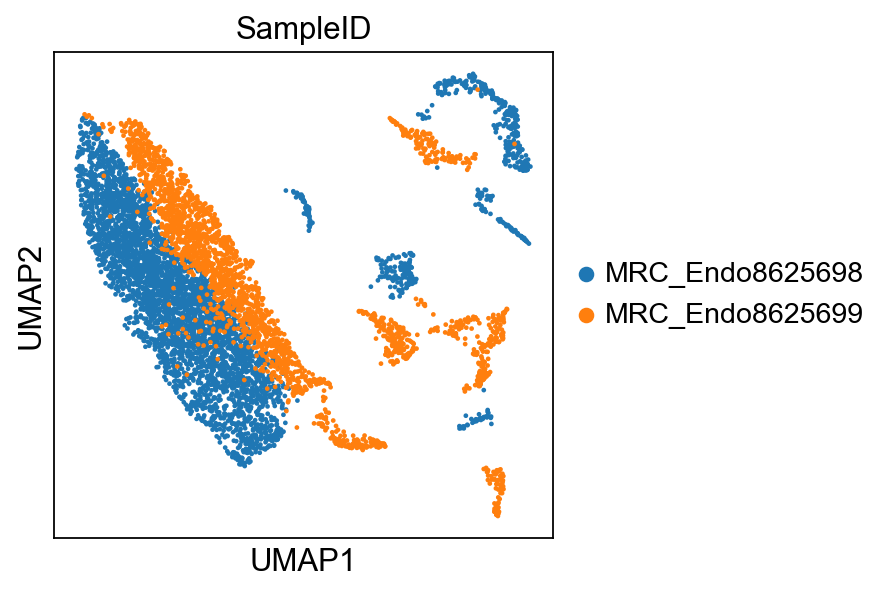

In [7]:
for item in data_list_2:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="SampleID")

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


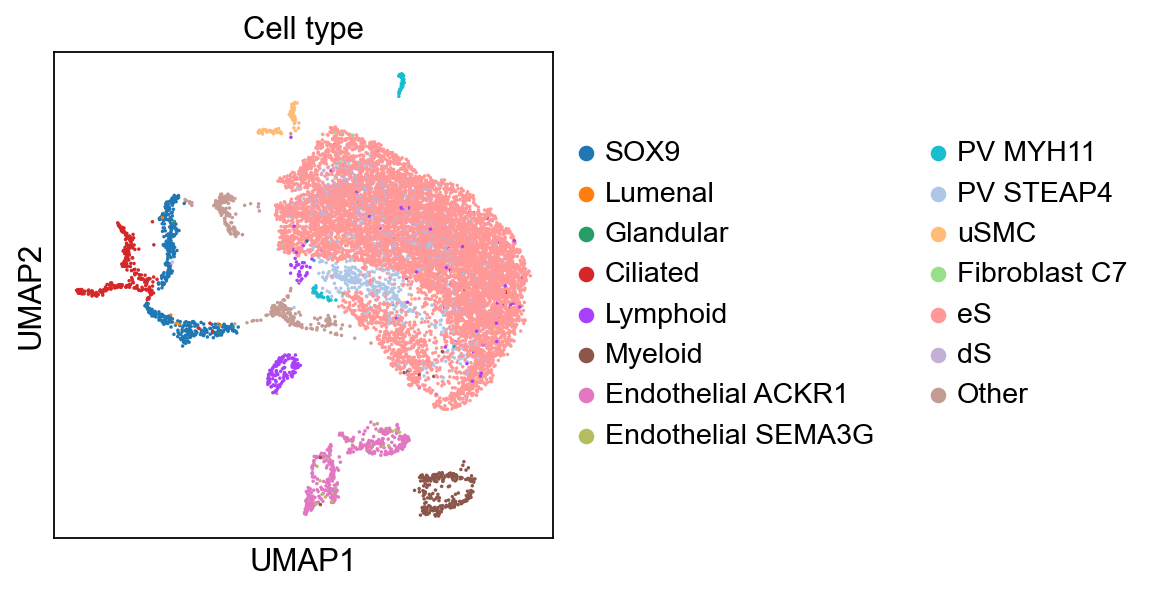

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


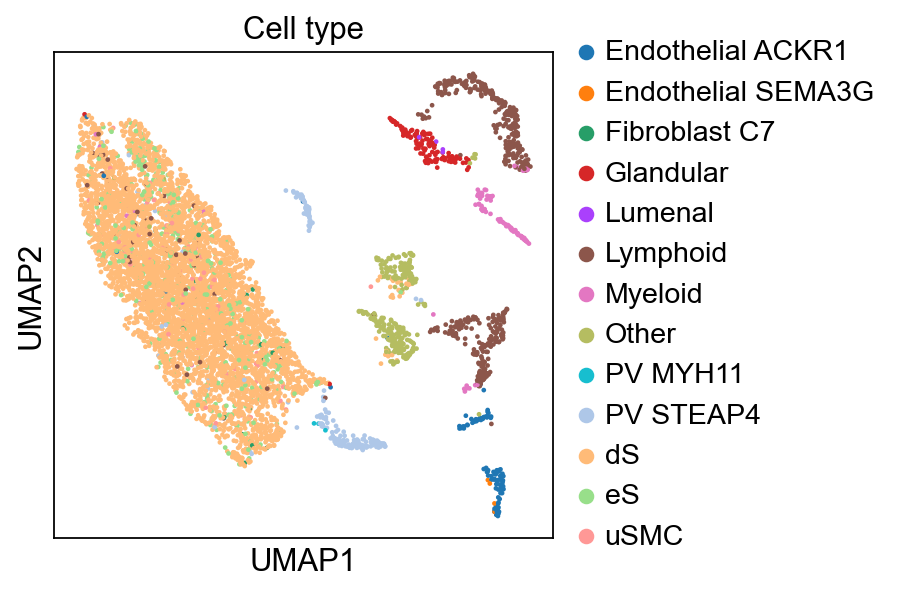

In [8]:
for item in data_list_2:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Cell type")

## 5. Finding marker genes

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


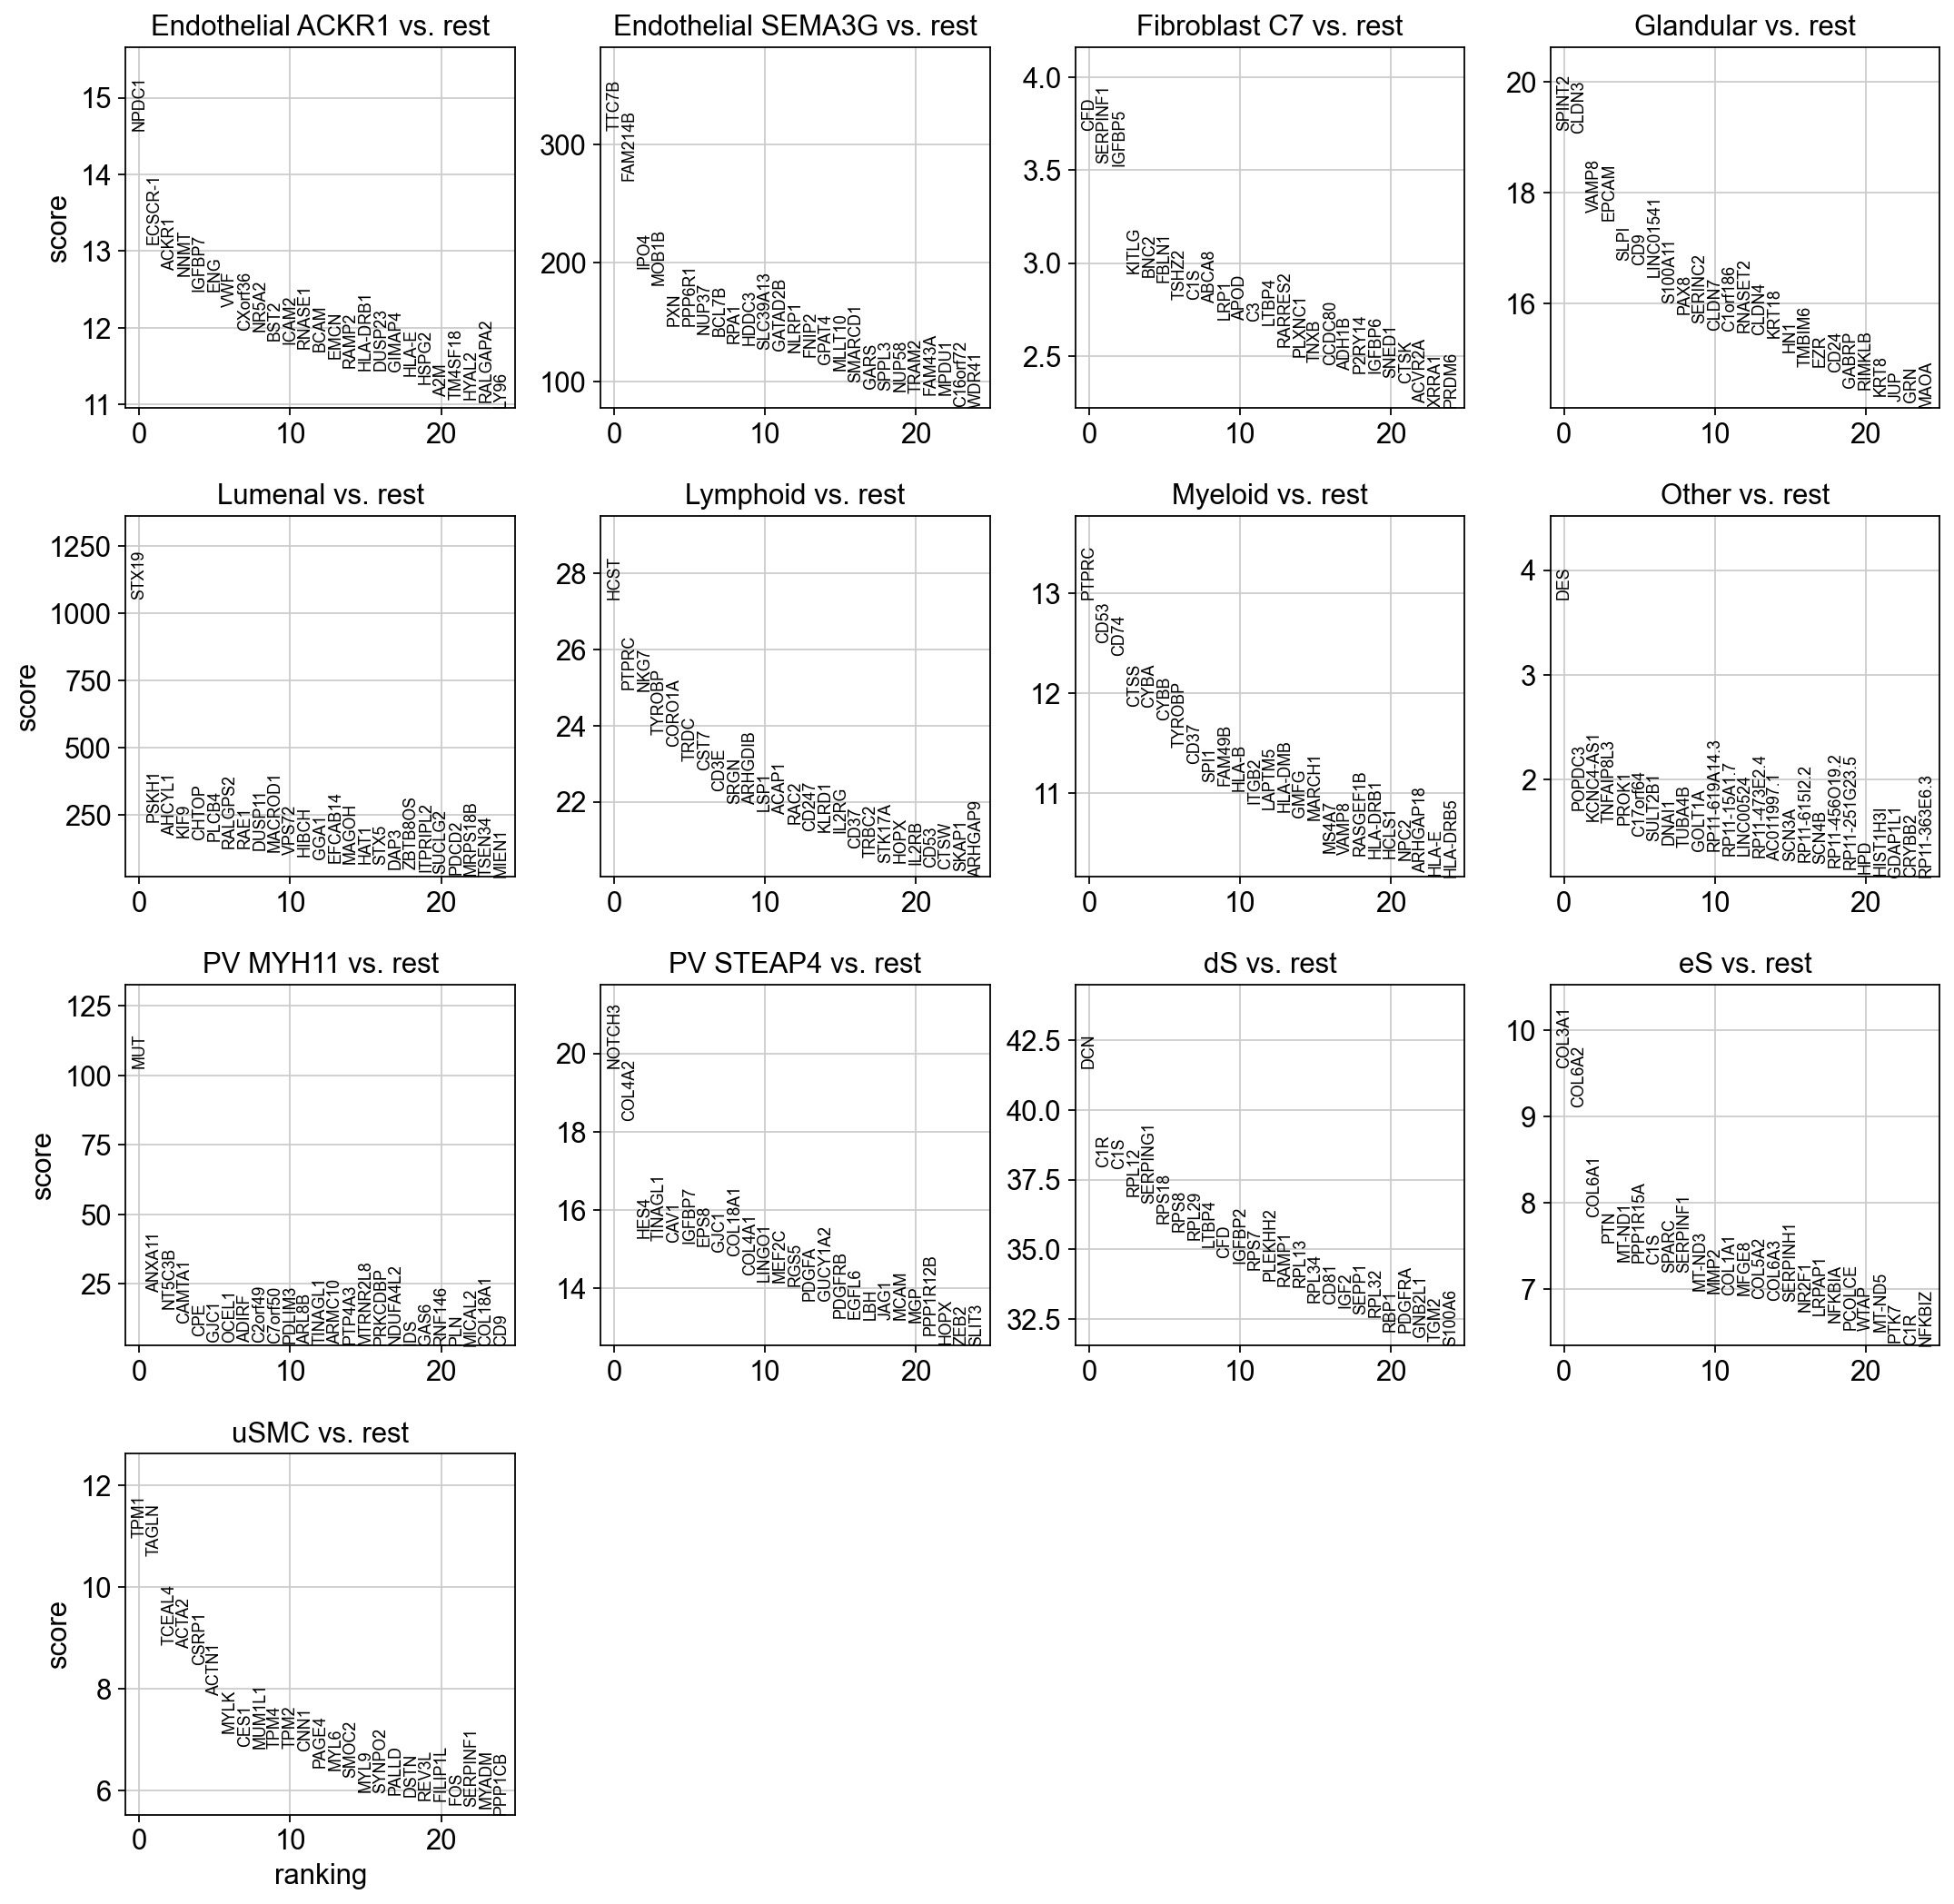

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished (0:00:19)


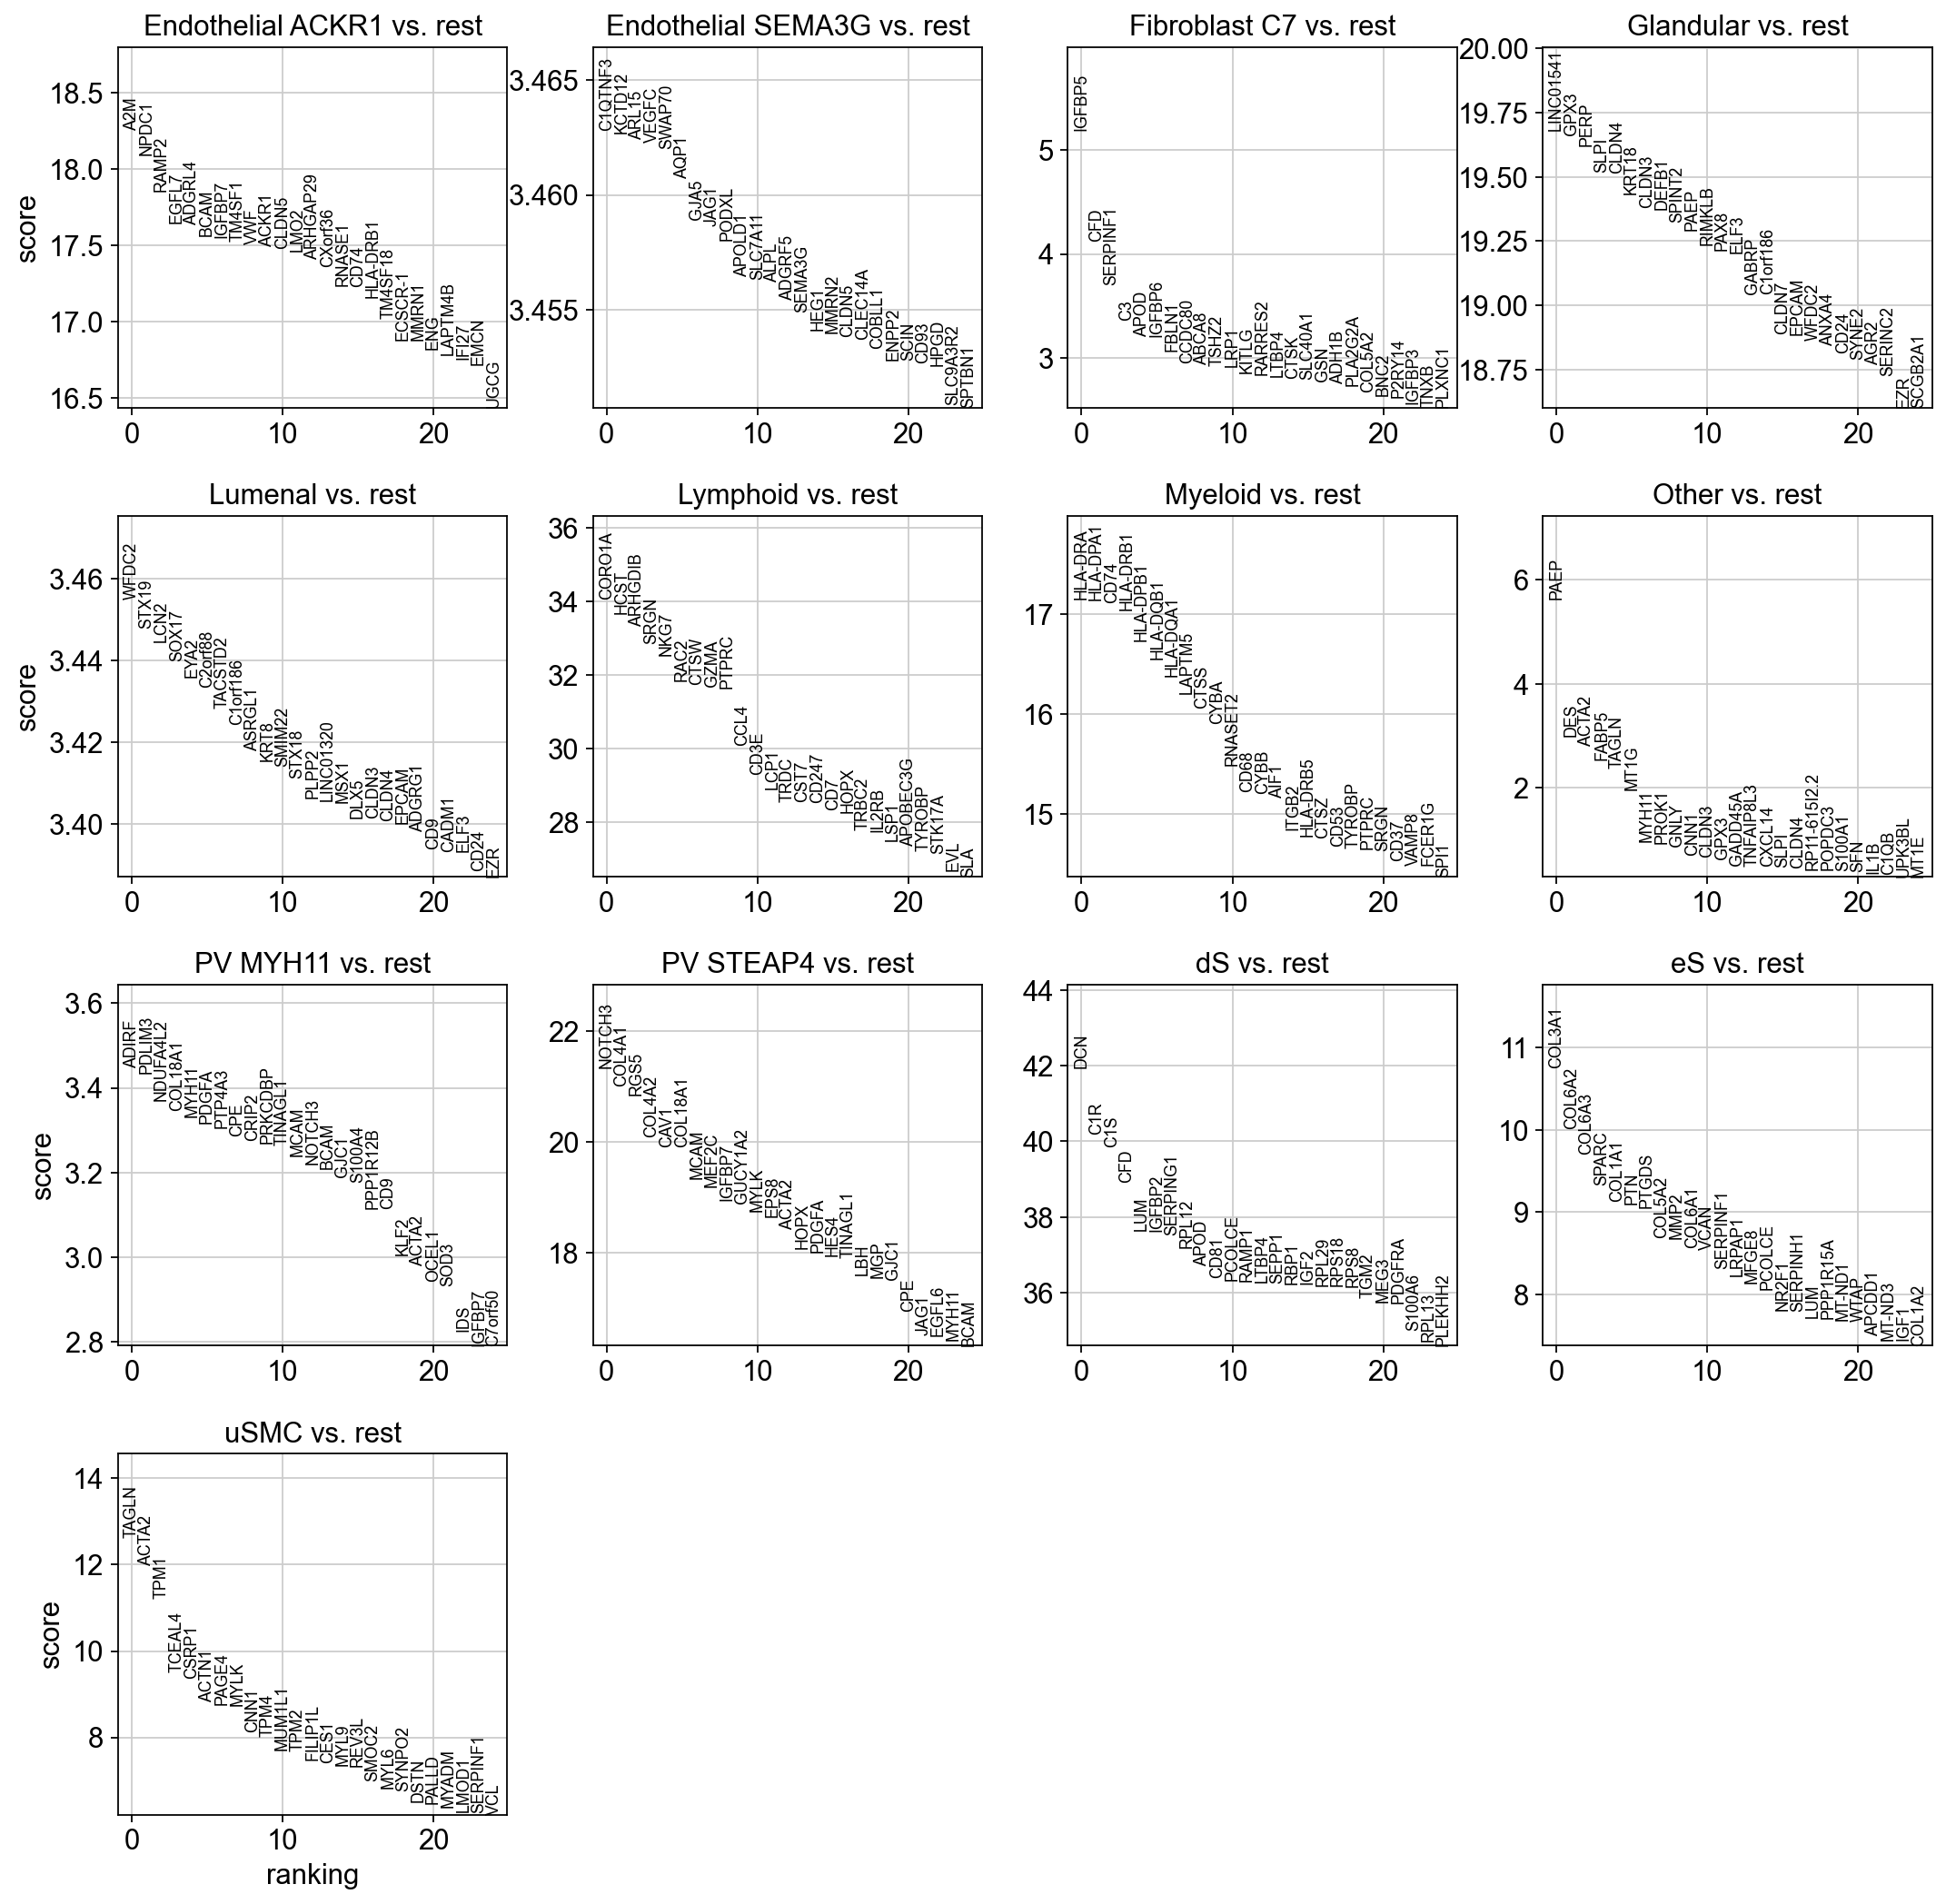

NameError: name 'adata' is not defined

In [21]:
    #t-test: compute a ranking for the highly differential genes in each cluster:

sc.tl.rank_genes_groups(adata_ti_merged_sec, 'Cell type', method='t-test')
sc.pl.rank_genes_groups(adata_ti_merged_sec, n_genes=25, sharey=False) #ln34

sc.settings.verbosity = 2  # reduce the verbosity #ln35

    #result of a Wilcoxon rank-sum test:

sc.tl.rank_genes_groups(adata_ti_merged_sec, 'Cell type', method='wilcoxon')
sc.pl.rank_genes_groups(adata_ti_merged_sec, n_genes=25, sharey=False) #ln36

adata.write(results_file) #ln37

    #rank genes using logistic regression:

sc.tl.rank_genes_groups(adata_ti_merged_sec, 'Cell type', method='logreg')
sc.pl.rank_genes_groups(adata_ti_merged_sec, n_genes=25, sharey=False) #ln38

In [ ]:
    #reload the object that has been saved with the Wilcoxon Rank-Sum test result:

#adata = sc.read(results_file) #ln40

In [ ]:
adata.obs

In [29]:
    #show the 10 top ranked genes per cluster in a dataframe:

pd.DataFrame(adata_ti_merged_sec.uns['rank_genes_groups']['names']).head(10) #ln41

,Endothelial ACKR1,Endothelial SEMA3G,Fibroblast C7,Glandular,Lumenal,Lymphoid,Myeloid,Other,PV MYH11,PV STEAP4,dS,eS,uSMC
0,A2M,C1QTNF3,IGFBP5,LINC01541,WFDC2,CORO1A,HLA-DRA,PAEP,ADIRF,NOTCH3,DCN,COL3A1,TAGLN
1,NPDC1,KCTD12,CFD,GPX3,STX19,HCST,HLA-DPA1,DES,PDLIM3,COL4A1,C1R,COL6A2,ACTA2
2,RAMP2,ARL15,SERPINF1,PERP,LCN2,ARHGDIB,CD74,ACTA2,NDUFA4L2,RGS5,C1S,COL6A3,TPM1
3,EGFL7,VEGFC,C3,SLPI,SOX17,SRGN,HLA-DRB1,FABP5,COL18A1,COL4A2,CFD,SPARC,TCEAL4
4,ADGRL4,SWAP70,APOD,CLDN4,EYA2,NKG7,HLA-DPB1,TAGLN,MYH11,CAV1,LUM,COL1A1,CSRP1
5,BCAM,AQP1,IGFBP6,KRT18,C2orf88,RAC2,HLA-DQB1,MT1G,PDGFA,COL18A1,IGFBP2,PTN,ACTN1
6,IGFBP7,GJA5,FBLN1,CLDN3,TACSTD2,CTSW,HLA-DQA1,MYH11,PTP4A3,MCAM,SERPING1,PTGDS,PAGE4
7,TM4SF1,JAG1,CCDC80,DEFB1,C1orf186,GZMA,LAPTM5,PROK1,CPE,MEF2C,RPL12,COL5A2,MYLK
8,VWF,PODXL,ABCA8,SPINT2,ASRGL1,PTPRC,CTSS,GNLY,CRIP2,IGFBP7,APOD,MMP2,CNN1
9,ACKR1,APOLD1,TSHZ2,PAEP,KRT8,CCL4,CYBA,CNN1,PRKCDBP,GUCY1A2,CD81,COL6A1,TPM4


In [ ]:
    #Get a table with the scores and groups:

result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5) #ln42

In [ ]:
    #Compare to a single cluster:

sc.tl.rank_genes_groups(adata_ti_merged_sec, 'Cell type', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata_ti_merged_sec, groups=['0'], n_genes=20) #ln43

    #more detailed view for a certain group:
sc.pl.rank_genes_groups_violin(adata_ti_merged_sec, groups='0', n_genes=8)

In [ ]:
    #reload the objects with the computed differential expression:
adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
    #If we want to compare a certain gene across groups:
sc.pl.violin(adata, ['MMP7', 'RPS2', 'PTMA'], groupby='leiden')

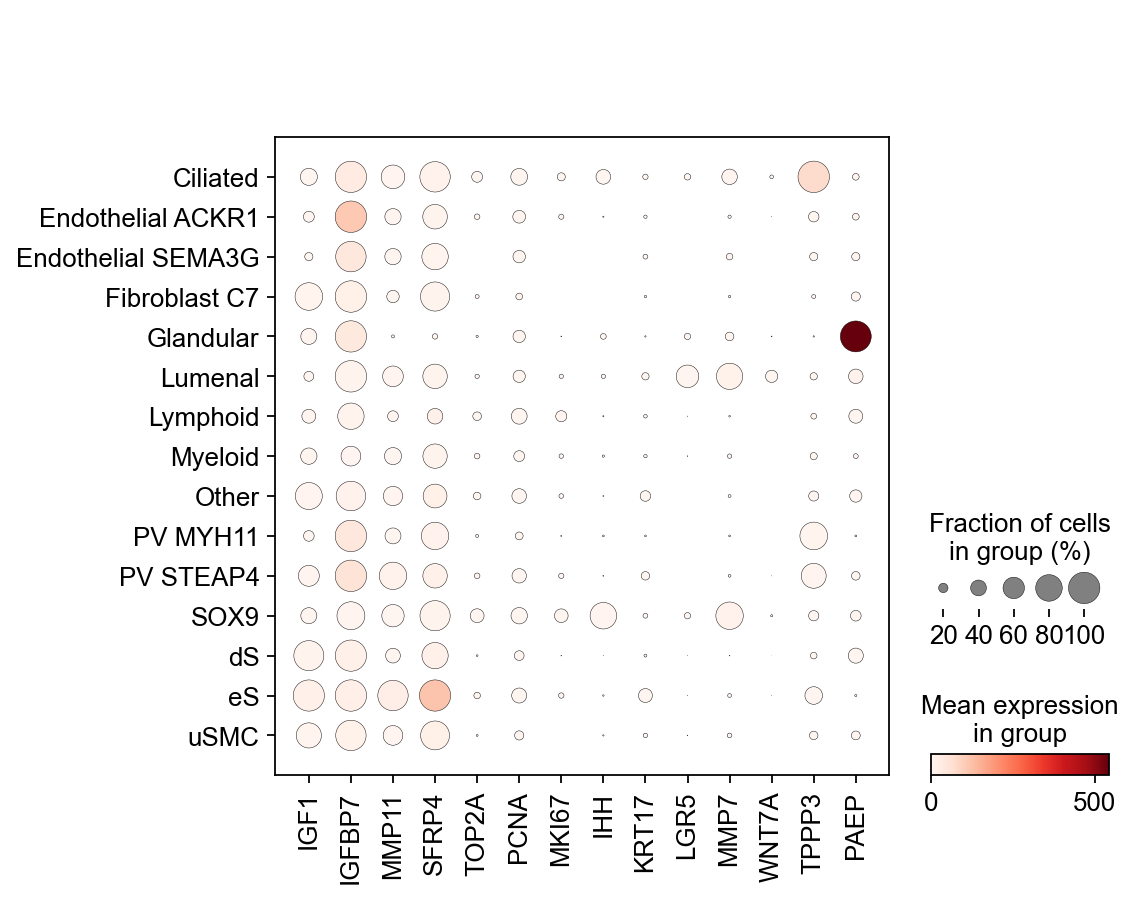

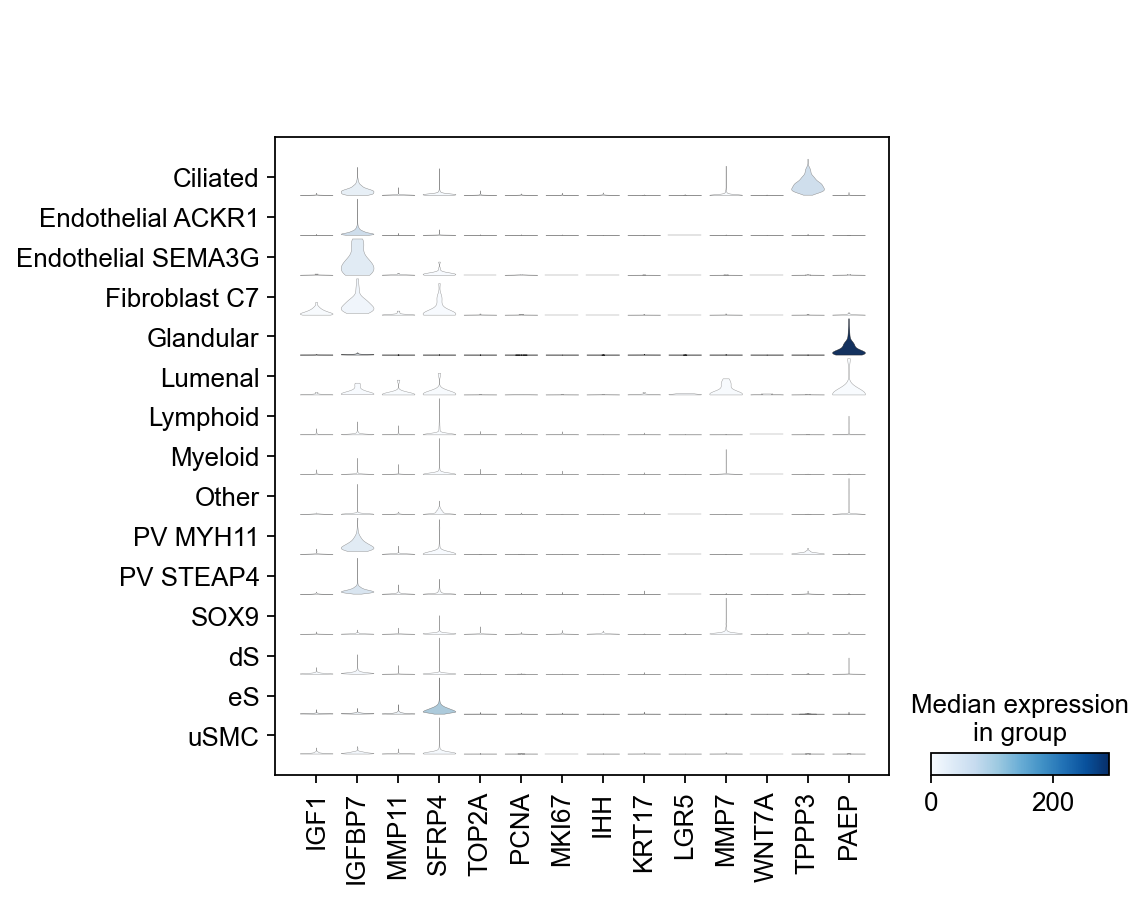

In [25]:
    #visualize the marker genes:
sc.pl.dotplot(adata_ti_merged, markers, groupby='Cell type');

sc.pl.stacked_violin(adata_ti_merged, markers, groupby='Cell type', rotation=90);

## 6. Comparing the merged Pro and Sec Samples using Heatmaps:

In [9]:
adata_ti_merged = ad.concat([adata_ti_merged_pro,adata_ti_merged_sec], join="outer")

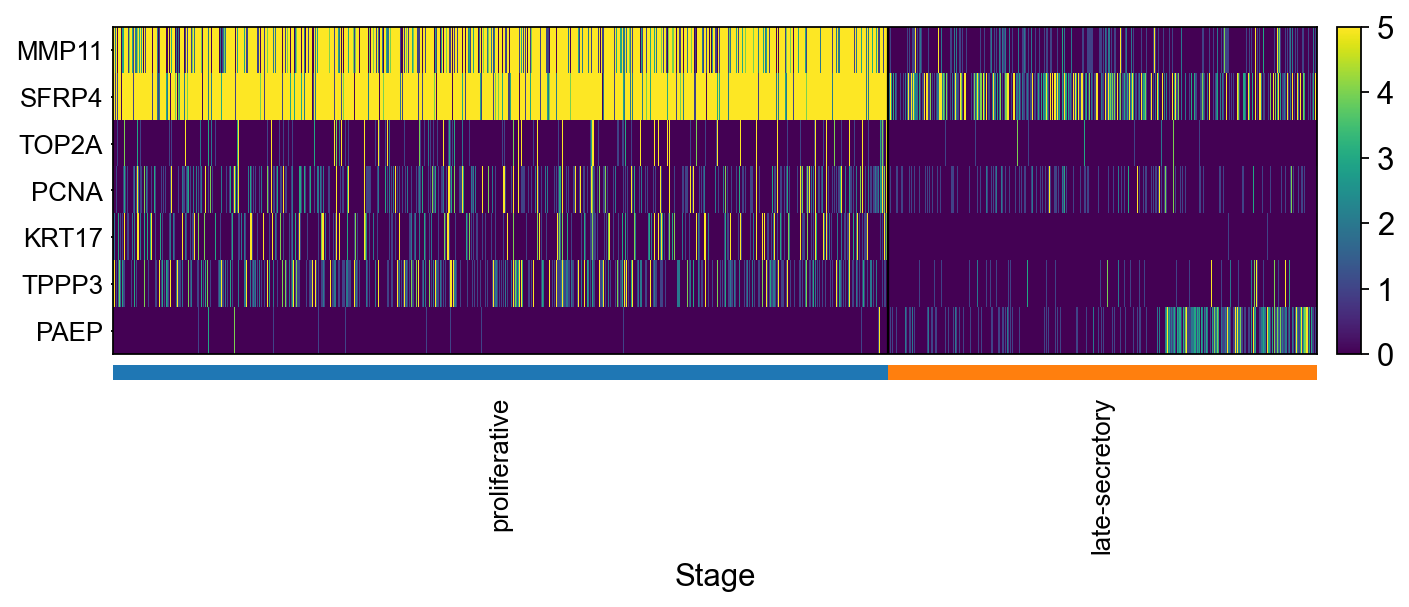

In [27]:
markers_menstrualflow = ['MMP1', 'MMP10', 'MMP3', 'MMP7', 'NCR3'] #'Wnt5', 'Wnt7a'
markers_proliferative = ['MMP11', 'SFRP4','TOP2A', 'PCNA', 'KRT17', 'TPPP3']
markers_secretory = ['PAEP']

markers = markers_proliferative + markers_secretory

adata_ti_merged.obs['Stage'].cat.reorder_categories(['proliferative', 'late-secretory'], inplace = True)
sc.pl.heatmap(adata_ti_merged, markers, groupby='Stage', swap_axes=True, vmax=5, cmap='viridis', figsize=[10,3], save='heatmap.png')

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)
    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_Cell type']`


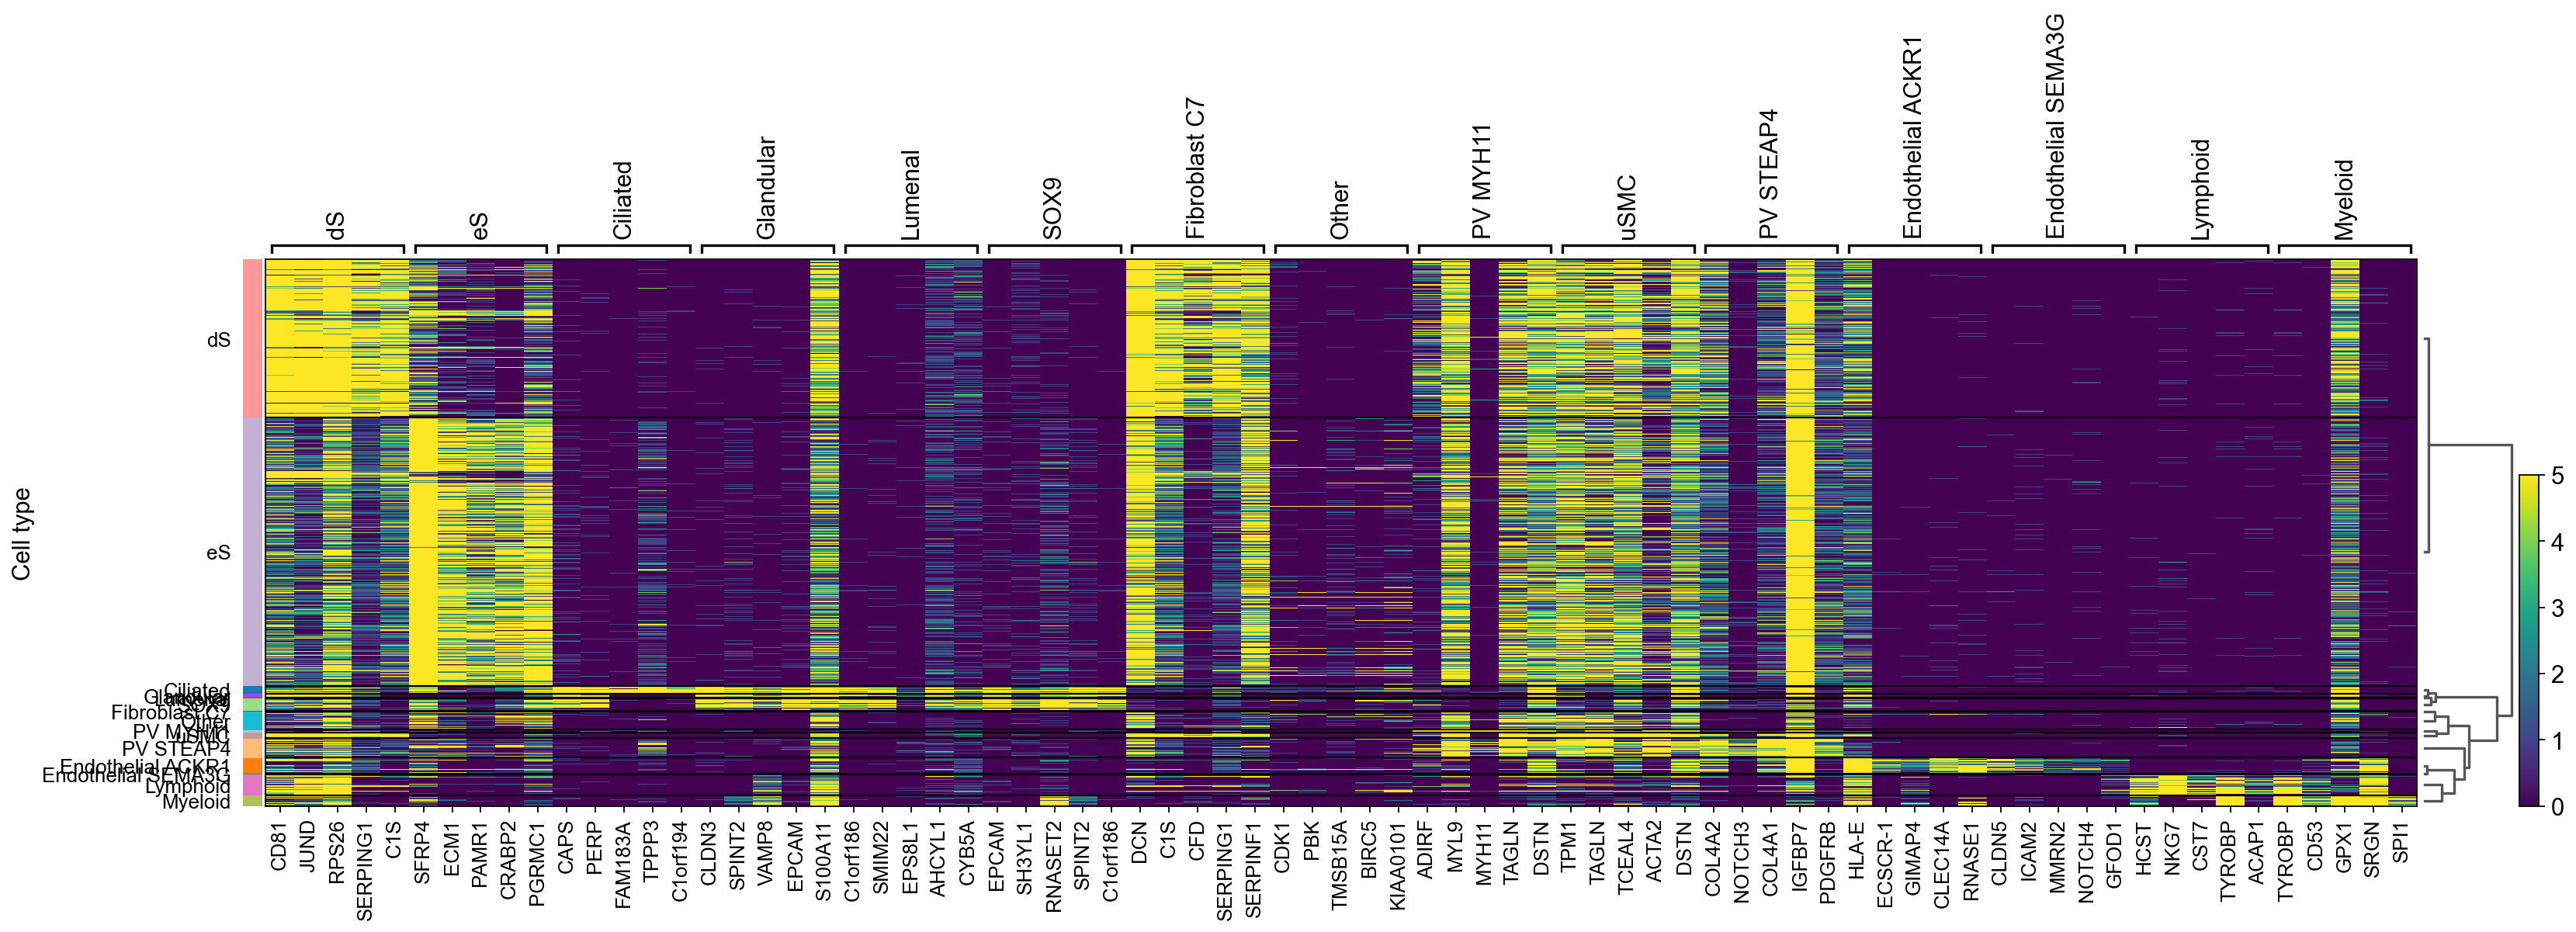

In [20]:
sc.tl.rank_genes_groups(adata_ti_merged, 'Cell type')
sc.pl.rank_genes_groups_heatmap(adata_ti_merged, n_genes=5, show_gene_labels=True, vmax=5)

## 7. Comparing the merged Pro and Sec Samples using other plots:

In [ ]:
    #quick way to check the expression of genes

sc.pl.dotplot(adata, marker_genes, 'clusters', dendrogram=True)

## matrixplot

In [ ]:
sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Heatmaps

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes, groupby='clusters', cmap='viridis', dendrogram=True, swap_axes=True)

sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);